In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

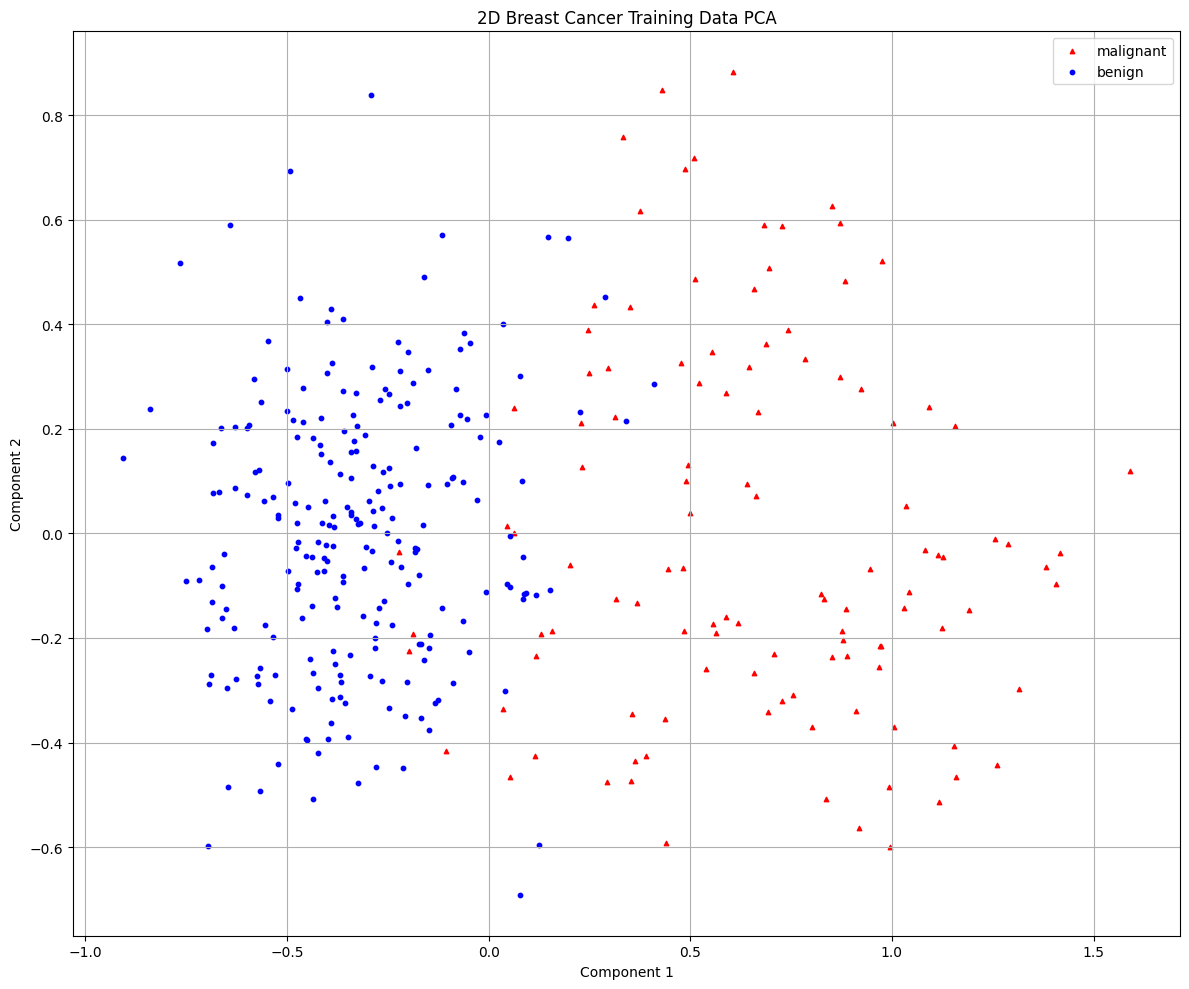

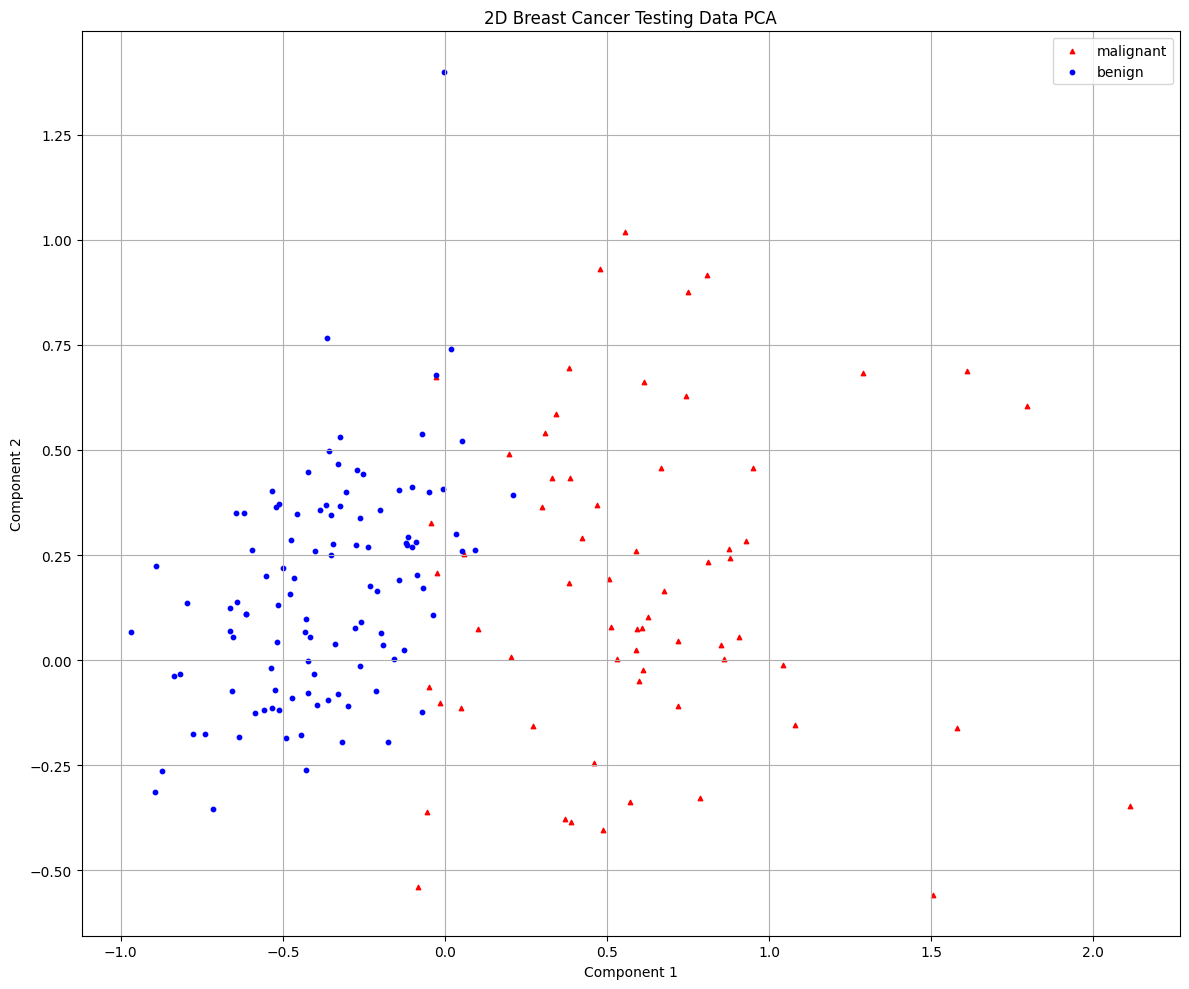

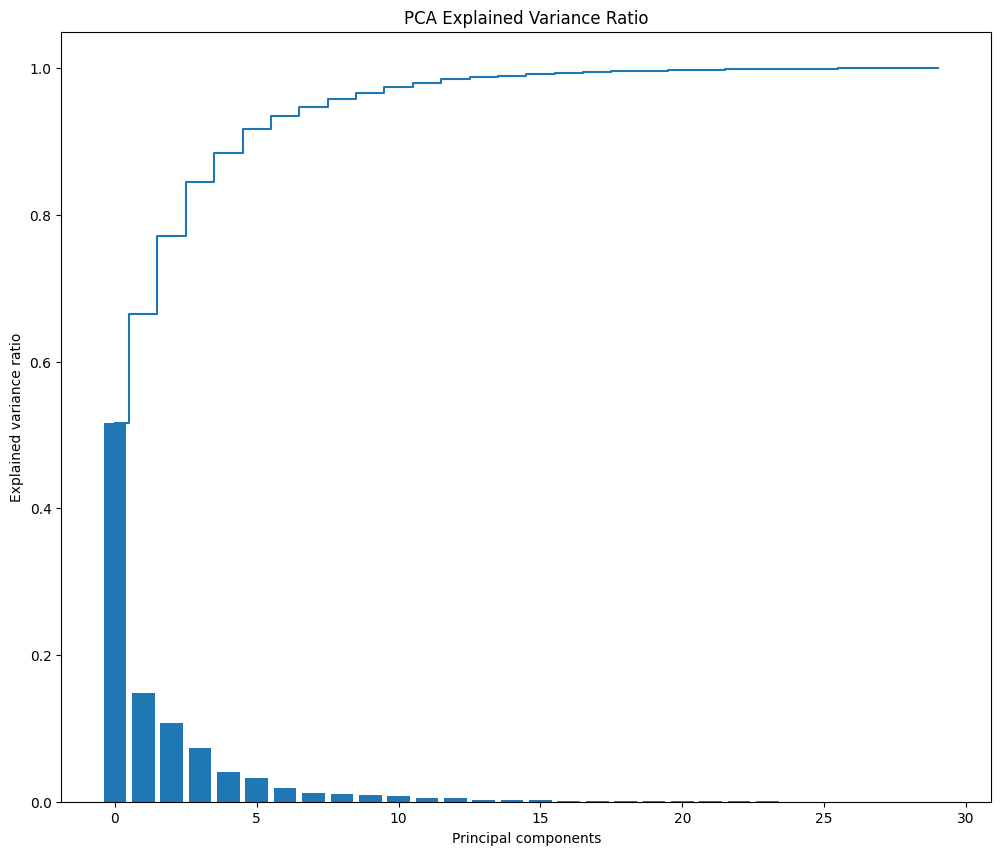

In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

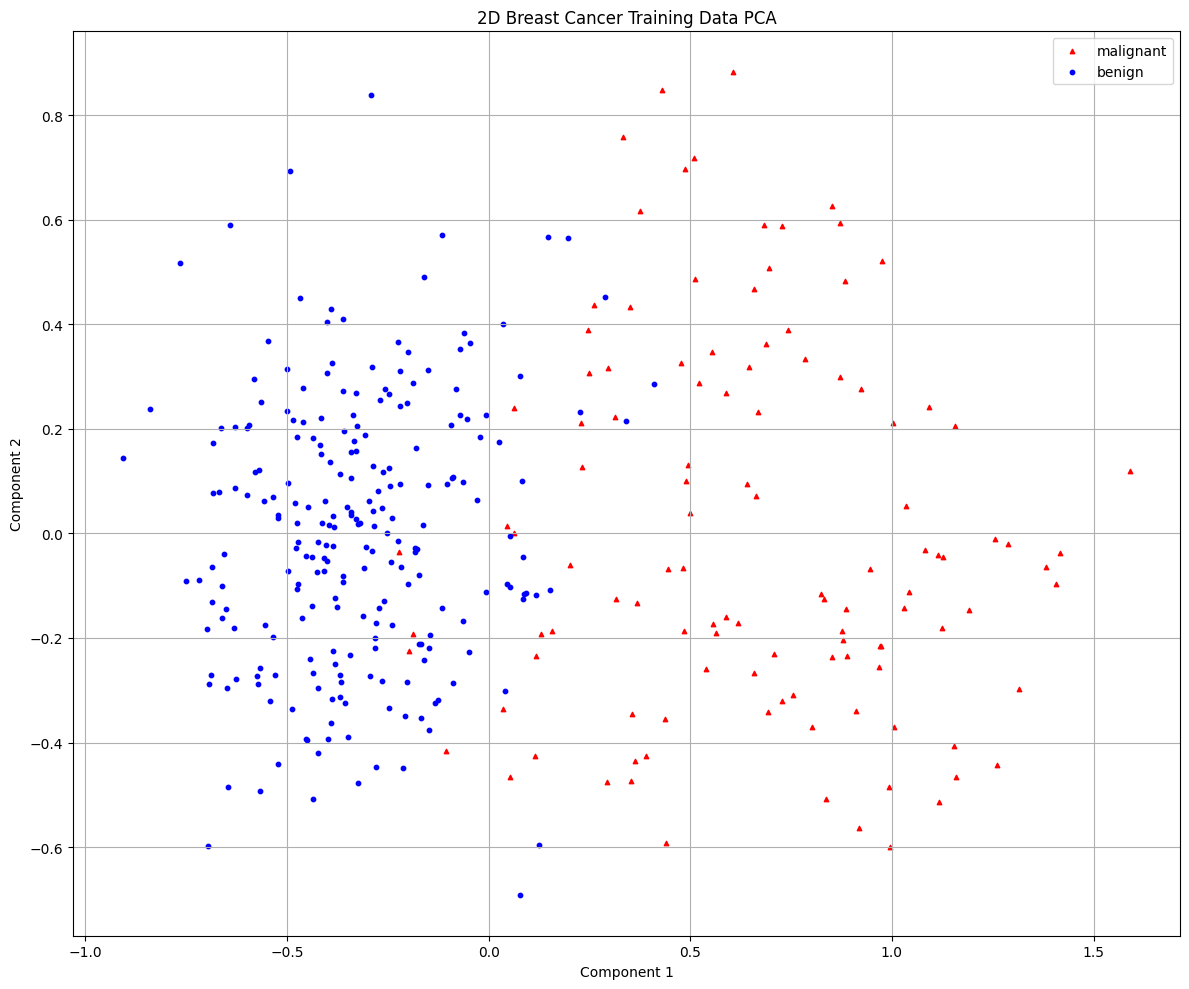

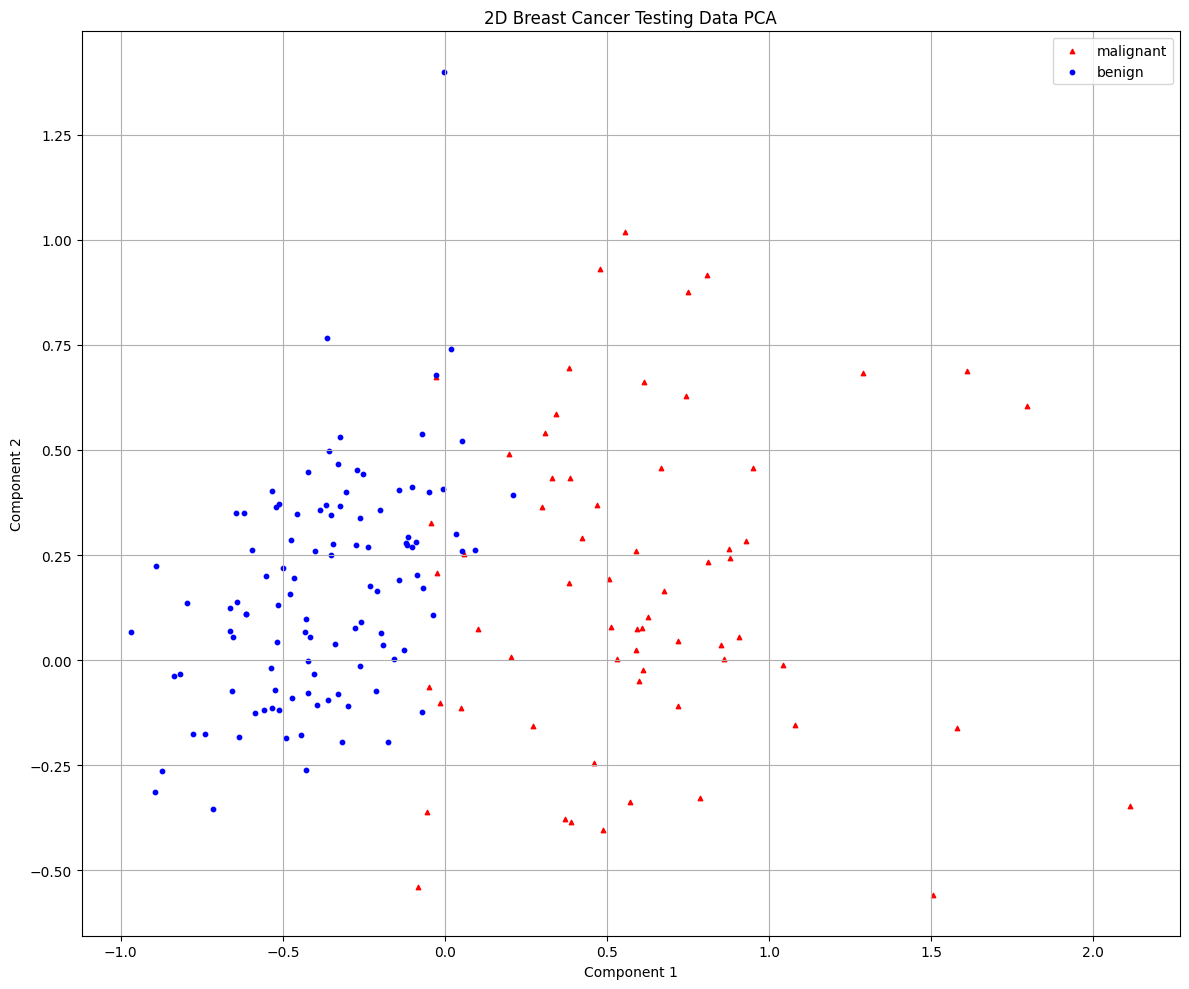

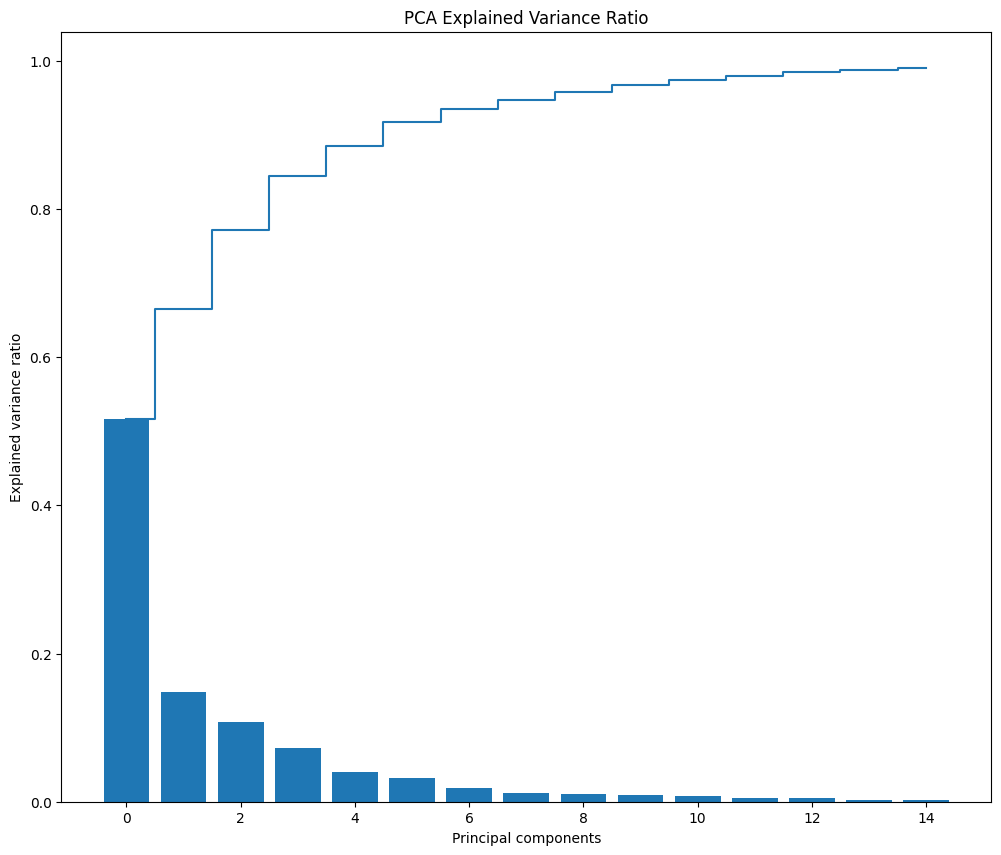

[I 2025-04-27 13:00:35,418] A new study created in memory with name: no-name-e36d3055-0d70-4990-a82c-9fef781ee9b2
[I 2025-04-27 13:01:41,636] Trial 0 finished with value: 0.9571428571428571 and parameters: {'n_estimators': 9147, 'max_depth': 11, 'learning_rate': 0.005117831589458058, 'subsample': 0.9870395897644446, 'colsample_bytree': 0.7774140439496745, 'gamma': 1.7170219838563776, 'reg_alpha': 0.034235524465628185, 'reg_lambda': 7.830157733546539e-07}. Best is trial 0 with value: 0.9571428571428571.
[I 2025-04-27 13:02:16,439] Trial 1 finished with value: 0.9514285714285714 and parameters: {'n_estimators': 4929, 'max_depth': 4, 'learning_rate': 0.008925015239050612, 'subsample': 0.7950838622296108, 'colsample_bytree': 0.695402739138966, 'gamma': 4.333746994663431, 'reg_alpha': 1.3660219842089357e-05, 'reg_lambda': 0.00015485837958873212}. Best is trial 0 with value: 0.9571428571428571.
[I 2025-04-27 13:02:31,003] Trial 2 finished with value: 0.9400000000000001 and parameters: {'n_es

Best trial:
Accuracy: 0.9714285714285715
Best hyperparameters:  {'n_estimators': 6179, 'max_depth': 7, 'learning_rate': 0.03384565775473714, 'subsample': 0.5384207798817735, 'colsample_bytree': 0.8701613695793734, 'gamma': 0.5705317711507014, 'reg_alpha': 3.662435013797732e-07, 'reg_lambda': 1.661007971805852e-06}


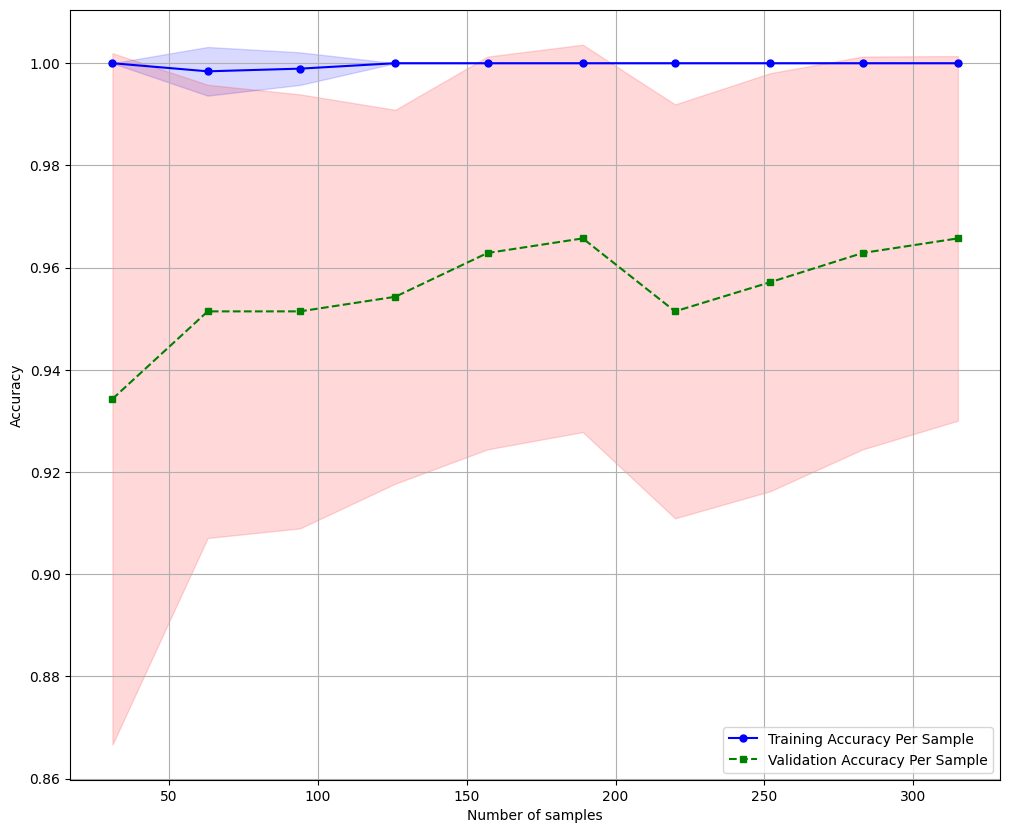

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC: 0.9813


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)